In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
median_household_income = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-MedianHouseholdIncome2015.csv', encoding="windows-1252")
over_25_completed_hs = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
people_below_poverty = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PercentagePeopleBelowPoverty.csv', encoding="windows-1252")
race_by_city = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-ShareRaceByCity.csv', encoding="windows-1252")
fatal_police_shooting_us = pd.read_csv('/content/drive/My Drive/data/cleaned-data/cleaned-PoliceKillingsUS.csv', encoding="windows-1252")
demographic = pd.read_csv('/content/drive/My Drive/data/cleaned-data/demographic.csv', encoding="windows-1252")
combined = pd.read_csv('/content/drive/My Drive/data/cleaned-data/combined.csv', encoding="windows-1252")
police_killing_us = pd.read_csv('/content/drive/My Drive/data/cleaned-data/police_killing_us.csv', encoding="windows-1252")

In [68]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29132 non-null  object 
 1   city                   29132 non-null  object 
 2   percent_completed_hs   29132 non-null  float64
 3   poverty_rate           29125 non-null  float64
 4   Median Income          27383 non-null  float64
 5   share_white            28930 non-null  float64
 6   share_black            28930 non-null  float64
 7   share_native_american  28930 non-null  float64
 8   share_asian            28930 non-null  float64
 9   share_hispanic         28930 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


In [69]:
demographic.describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29132.000000,29125.000000,27383.000000,28930.000000,28930.000000,28930.000000,28930.000000,28930.000000
mean,85.733805,16.444045,51177.670672,83.190149,6.882655,2.856685,1.547159,9.203426
std,11.875153,13.176623,24887.873873,21.649996,15.673815,12.627056,4.293338,17.269697
min,0.000000,0.000000,4511.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,7.100000,35625.000000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,88.400000,13.700000,45305.000000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,93.500000,22.500000,59482.000000,96.900000,4.300000,0.900000,1.200000,8.000000
max,100.000000,100.000000,244083.000000,100.000000,100.000000,100.000000,67.100000,100.000000




*   85.7% of people over 25 completed high school
*   Average median income is 51177
*   16.4% of people are in poverty


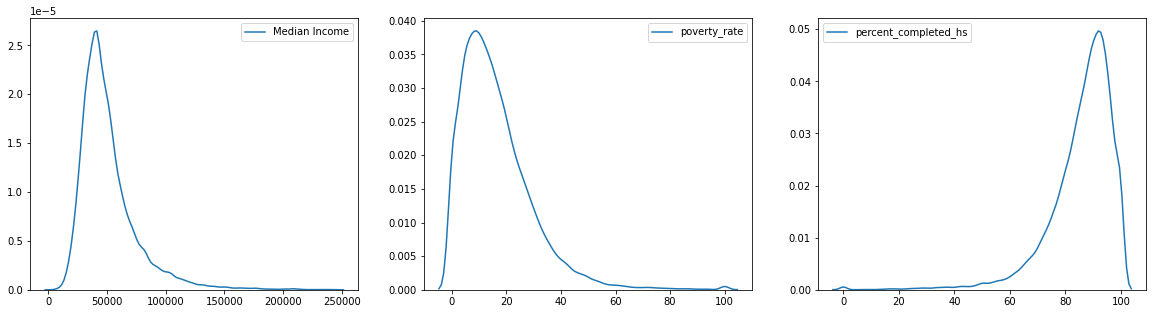

In [70]:
#demographic = demographic.dropna()
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(demographic['Median Income'], ax=ax[0])
sns.kdeplot(demographic['poverty_rate'], ax=ax[1])
sns.kdeplot(demographic['percent_completed_hs'], ax=ax[2])

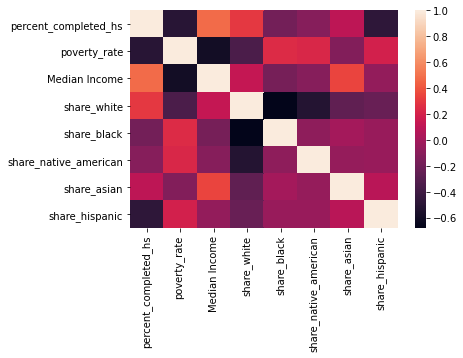

In [71]:
sns.heatmap(demographic.corr())

In [72]:
fatal_police_shooting_us['date'] = pd.to_datetime(fatal_police_shooting_us['date'], format='%d/%m/%y')

In [73]:
fatal_police_shooting_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

In [74]:
police_killing_us['date'].sort_values()

947     01/01/16
1820    01/01/17
1825    01/01/17
1824    01/01/17
1823    01/01/17
          ...   
1698    31/10/16
946     31/12/15
1819    31/12/16
1817    31/12/16
1818    31/12/16
Name: date, Length: 2254, dtype: object

The data was collected from 2015-01-02 till 2017-07-31

<Figure size 720x360 with 0 Axes>

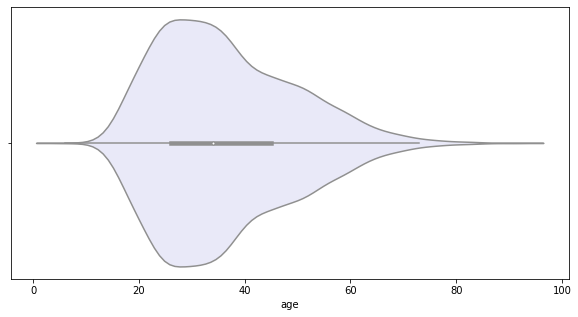

In [75]:
plt.figure(figsize=(10,5))
sns.violinplot(x=police_killing_us['age'],color='lavender')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


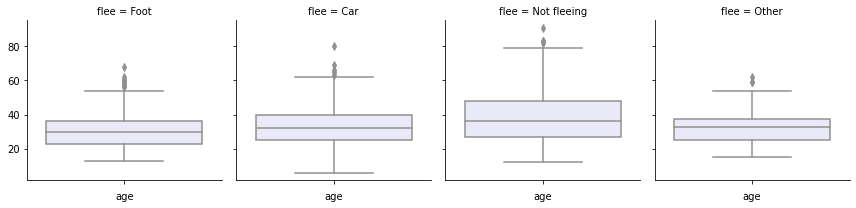

In [76]:
grid = sns.FacetGrid(police_killing_us,col='flee',col_order=['Foot','Car','Not fleeing','Other'])
grid.map(sns.boxplot, 'age', orient='vertical', color='lavender')

Text(0.5, 1.0, 'Average age for each gender and race')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,20,Jessie Hernandez,2015-01-26,shot,vehicle,17.0,F,H,Denver,CO,False,other,Not fleeing,False
147,189,Jessica Uribe,2015-02-28,shot,knife,28.0,F,H,Tucson,AZ,False,other,Not fleeing,False
717,871,Norma Angelica Guzman,2015-09-27,shot,knife,37.0,F,H,Los Angeles,CA,True,other,Not fleeing,True
1433,1695,Melissa Ventura,2016-07-05,shot,knife,24.0,F,H,Yuma,AZ,False,other,Not fleeing,False


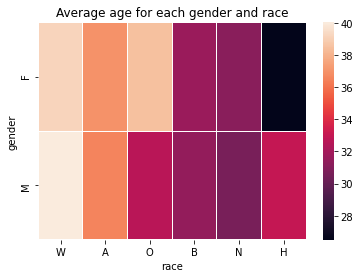

In [77]:
a=pd.pivot_table(data=fatal_police_shooting_us, values='age', index='gender', columns='race')
a=a.reindex(columns=['W','A','O','B','N','H'])
plt.title('Average age for each gender and race')
sns.heatmap(a, mask=a.isnull(), linewidth=0.01, linecolor='white')
fatal_police_shooting_us[(fatal_police_shooting_us['gender']=='F') & (fatal_police_shooting_us['race']=='H')]

White vitims in average are the oldest, whereas Native American and Hispanic are the youngest.
For all races except White and Hispanic, Male vitims on average are younger.
Female Hispanic are noticably younger than the others. So I tried to select cases in which Female Hispanic were victimes. As a result, there was only 4 cases.


!Note:

*   W: White - Not Hispanic
*   B: Black - Not Hispanic
*   A: Asian
*   H: Hispanic
*   N: Native American
*   O: Other




<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Total number of people killed')

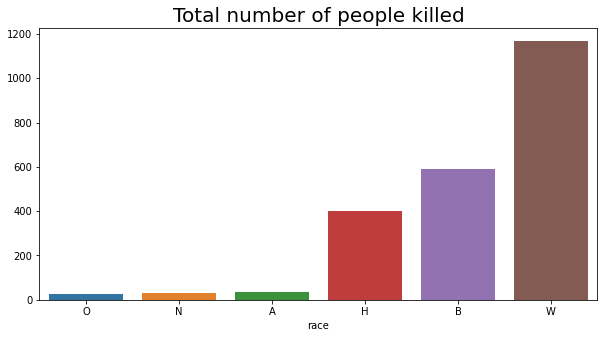

In [78]:
a=fatal_police_shooting_us.groupby('race').size().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=a.index, y=a)
plt.title('Total number of people killed',fontdict={'fontsize':20})

In this chart, we can see that most of the victims were White. However, since the total population of each race in the US is different, especially for White taking a large portion of the US population, a bar plot with the percent people being killed by race would be a better visualization.

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Percent of people per race killed')

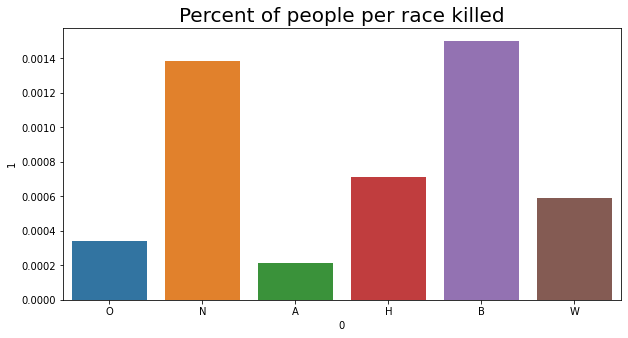

In [79]:
a = police_killing_us.groupby('race').size().sort_values()
percent_death_per_race = list()
# these are the population for each race in 2017 collected from https://en.wikipedia.org/wiki/Demographics_of_the_United_States
total_population_per_race = {
    'White':197277789,
    'NativeAmerican':2098763,
    'Asian':16989540,
    'Hispanic':56510571,
    'Black':39445495,
    'Others':8166727
}

for race, total_death in a.iteritems():
  if race == 'W':
    death_per_race = total_death/total_population_per_race['White']*100
  elif race == 'N':
    death_per_race = total_death/total_population_per_race['NativeAmerican']*100
  elif race == 'A':
    death_per_race = total_death/total_population_per_race['Asian']*100
  elif race == 'H':
    death_per_race = total_death/total_population_per_race['Hispanic']*100
  elif race == 'B':
    death_per_race = total_death/total_population_per_race['Black']*100
  else:
    death_per_race = total_death/total_population_per_race['Others']*100
  percent_death_per_race.append((race, death_per_race))
percent_death_per_race = pd.DataFrame(percent_death_per_race)
plt.figure(figsize=(10,5))
sns.barplot(x=percent_death_per_race[0], y=percent_death_per_race[1])
plt.title('Percent of people per race killed',fontdict={'fontsize':20})

This chart shows that Black and Native American are much more likely to be shot. The proportion and Black being shot is almost three times higher than White.
However, this chart still have a caveat: total death per race divided by the total population per race may not be a good representation for the racial bias. What if Black and Native American have higher proportion of being shot was because they caused more criminals? Instead of dividing by the total population per race, we should divide it by total criminal case per race.

In [80]:
## TO DO: Percent of criminal per race killed

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Total death each day from 2015-01 till 2017-09')

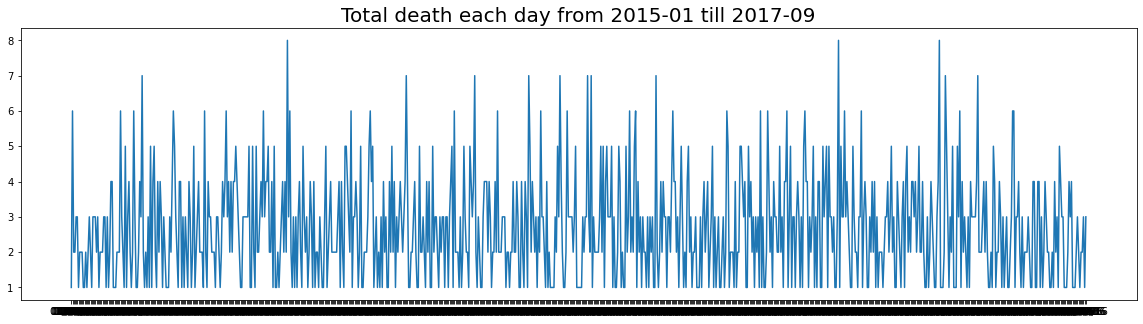

In [81]:
a = police_killing_us.groupby('date').size()
plt.figure(figsize=(20,5))
plt.title('Total death each day from 2015-01 till 2017-09',fontdict={'fontsize':20})
sns.lineplot(data=a)

Time and total death are not correlated

<Figure size 1440x360 with 0 Axes>

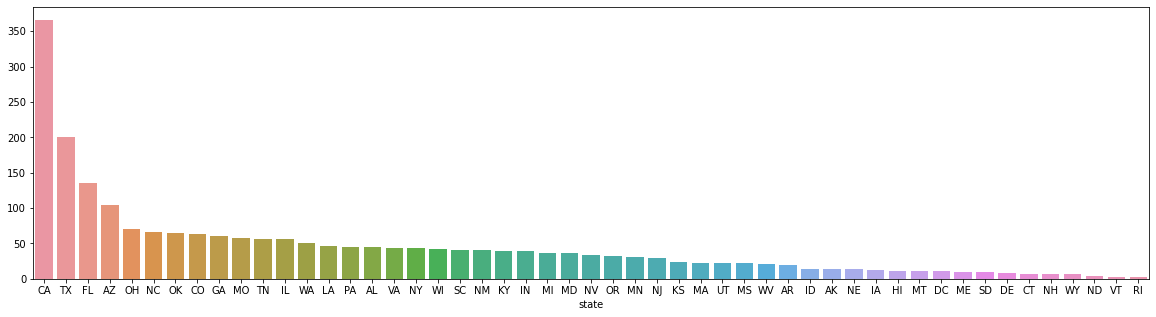

In [82]:
##### need to divide by each state's polulation
a = police_killing_us.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x = a.index, y = a)

CA, TX, FL and have most police killing cases


Same as cases per race, for this cases per city, we also need to divide the number by total criminals per city